### Import libraries 

In [1]:
#per creare rete
import pandas as pd
from extract import Count, SocialETL, SocialDB
from rich import print
import networkx as nx
import networkx.algorithms as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.utils import np_random_state

#per la task
import networkx as nx
import cdlib
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import NodeClustering
from networkx.generators.community import LFR_benchmark_graph

#altre
import seaborn as sns
import numpy as np
import math
import warnings
from collections import Counter
import numpy as np
warnings.filterwarnings('ignore')

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'wurlitzer'}


Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [2]:
m = SocialDB(100)

In [3]:
m.df.index

Int64Index([559657, 768929, 759751, 388868, 578801, 258347, 455353, 868612,
            648152, 205412, 537293, 926365, 531869, 828117, 627163, 251458,
            441904, 957232, 527175, 980889, 243154, 738293, 335007, 559855,
            270002, 530081, 675831, 313446, 241617, 874164, 689594, 602485,
            922259, 196682, 753809, 667626, 774446, 643534, 714982, 341226,
            760489, 413009, 667664, 256985, 328422, 785335, 328417, 985046,
            873690, 112438, 639778, 684859, 431327, 588242, 953877, 937965,
            286103, 981978, 521974, 453946, 975916, 242385, 168280, 401280,
            716238, 406329, 563834, 279857, 776684, 181689, 872238, 245460,
            644167, 536183, 676188, 516266, 547150, 484441, 167637, 887751,
            830421, 448646, 325032, 949136, 393623, 382397, 779671, 978075,
            270548, 520440, 657212, 573258, 509155, 521969, 630258, 929957,
            719058, 602609, 638977, 386140],
           dtype='int64', name='id')

In [4]:
m.df["id"] = m.df.index
m.df["class"]

id
559657    nocare
768929    proukr
759751    prorus
388868    proukr
578801       pax
           ...  
929957       pax
719058    nocare
602609    proukr
638977    prorus
386140       pax
Name: class, Length: 100, dtype: category
Categories (4, object): ['nocare', 'pax', 'prorus', 'proukr']

In [5]:
id_user=[]
cat=[]
for e in m.df.iterrows():
    id_user.append(e[0])
for c in m.df['class']:
    cat.append((c))

In [6]:
df_nodes=pd.DataFrame({'id': id_user,
                      'cat': cat})
df_nodes

,id,cat
0,559657,nocare
1,768929,proukr
2,759751,prorus
3,388868,proukr
4,578801,pax
...,...,...
95,929957,pax
96,719058,nocare
97,602609,proukr
98,638977,prorus


In [7]:
G = nx.Graph()

In [8]:
#categoria, 'author.location', 'author.verified', 
for i, e in enumerate(df_nodes['id']):
    G.add_node(e, cat=df_nodes['cat'][i])

In [9]:
list(G.nodes.data()) #we can use all the operation about dictionary on these attributes

[(559657, {'cat': 'nocare'}),
 (768929, {'cat': 'proukr'}),
 (759751, {'cat': 'prorus'}),
 (388868, {'cat': 'proukr'}),
 (578801, {'cat': 'pax'}),
 (258347, {'cat': 'proukr'}),
 (455353, {'cat': 'proukr'}),
 (868612, {'cat': 'prorus'}),
 (648152, {'cat': 'proukr'}),
 (205412, {'cat': 'nocare'}),
 (537293, {'cat': 'prorus'}),
 (926365, {'cat': 'pax'}),
 (531869, {'cat': 'proukr'}),
 (828117, {'cat': 'nocare'}),
 (627163, {'cat': 'nocare'}),
 (251458, {'cat': 'nocare'}),
 (441904, {'cat': 'nocare'}),
 (957232, {'cat': 'proukr'}),
 (527175, {'cat': 'proukr'}),
 (980889, {'cat': 'prorus'}),
 (243154, {'cat': 'prorus'}),
 (738293, {'cat': 'nocare'}),
 (335007, {'cat': 'proukr'}),
 (559855, {'cat': 'proukr'}),
 (270002, {'cat': 'proukr'}),
 (530081, {'cat': 'proukr'}),
 (675831, {'cat': 'prorus'}),
 (313446, {'cat': 'nocare'}),
 (241617, {'cat': 'pax'}),
 (874164, {'cat': 'pax'}),
 (689594, {'cat': 'pax'}),
 (602485, {'cat': 'pax'}),
 (922259, {'cat': 'nocare'}),
 (196682, {'cat': 'prorus'})

In [10]:
m.edges

[{'id': 885320, 'from': 738293, 'to': 926365},
 {'id': 119794, 'from': 270002, 'to': 516266},
 {'id': 234947, 'from': 448646, 'to': 689594},
 {'id': 586489, 'from': 251458, 'to': 648152},
 {'id': 379216, 'from': 520440, 'to': 657212},
 {'id': 703051, 'from': 753809, 'to': 393623},
 {'id': 572807, 'from': 630258, 'to': 521974},
 {'id': 346903, 'from': 167637, 'to': 887751},
 {'id': 913259, 'from': 406329, 'to': 588242},
 {'id': 198772, 'from': 563834, 'to': 868612},
 {'id': 851913, 'from': 873690, 'to': 588242},
 {'id': 779555, 'from': 196682, 'to': 828117},
 {'id': 858903, 'from': 393623, 'to': 256985},
 {'id': 602235, 'from': 657212, 'to': 639778},
 {'id': 502601, 'from': 602485, 'to': 714982},
 {'id': 825918, 'from': 830421, 'to': 760489},
 {'id': 518925, 'from': 245460, 'to': 286103},
 {'id': 600804, 'from': 630258, 'to': 716238},
 {'id': 713606, 'from': 341226, 'to': 520440},
 {'id': 485553, 'from': 168280, 'to': 547150},
 {'id': 936203, 'from': 270002, 'to': 627163},
 {'id': 39761

In [11]:
edges = [(x["from"], x["to"]) for x in m.edges]
print(edges)

[
    (738293, 926365),
    (270002, 516266),
    (448646, 689594),
    (251458, 648152),
    (520440, 657212),
    (753809, 393623),
    (630258, 521974),
    (167637, 887751),
    (406329, 588242),
    (563834, 868612),
    (873690, 588242),
    (196682, 828117),
    (393623, 256985),
    (657212, 639778),
    (602485, 714982),
    (830421, 760489),
    (245460, 286103),
    (630258, 716238),
    (341226, 520440),
    (168280, 547150),
    (270002, 627163),
    (559855, 484441),
    (270548, 286103),
    (245460, 627163),
    (738293, 785335),
    (168280, 286103),
    (638977, 181689),
    (341226, 785335),
    (256985, 341226),
    (547150, 760489),
    (563834, 527175),
    (639778, 980889),
    (874164, 644167),
    (279857, 386140),
    (341226, 978075),
    (753809, 335007),
    (953877, 530081),
    (279857, 873690),
    (639778, 181689),
    (325032, 256985),
    (953877, 630258),
    (256985, 830421),
    (386140, 648152),
    (830421, 716238),
    (521974, 785335),
    (536183, 602485),
    (602609, 313446),
    (828117, 382397),
    (243154, 328422),
    (768929, 270002),
    (328422, 779671),
    (785335, 957232),
    (978075, 657212),
    (484441, 759751),
    (559657, 520440),
    (559855, 245460),
    (406329, 441904),
    (684859, 929957),
    (413009, 980889),
    (547150, 559657),
    (563834, 521969),
    (431327, 667664),
    (676188, 639778),
    (981978, 779671),
    (196682, 241617),
    (639778, 448646),
    (335007, 521974),
    (453946, 413009),
    (205412, 929957),
    (978075, 325032),
    (873690, 537293),
    (279857, 181689),
    (245460, 256985),
    (874164, 774446),
    (386140, 978075),
    (537293, 684859),
    (779671, 382397),
    (242385, 981978),
    (509155, 547150),
    (573258, 547150),
    (530081, 684859),
    (667664, 657212),
    (644167, 243154),
    (980889, 325032),
    (243154, 516266),
    (388868, 929957),
    (531869, 559657),
    (413009, 559657),
    (874164, 168280),
    (453946, 714982),
    (639778, 196682),
    (776684, 667626),
    (937965, 768929),
    (386140, 627163),
    (627163, 382397),
    (667664, 258347),
    (978075, 431327),
    (205412, 868612),
    (776684, 638977),
    (167637, 547150),
    (830421, 393623),
    (868612, 258347),
    (667626, 828117),
    (251458, 401280),
    (559855, 406329),
    (602609, 785335),
    (521969, 675831),
    (957232, 520440),
    (241617, 559855),
    (779671, 559855),
    (638977, 455353),
    (455353, 719058),
    (573258, 676188),
    (981978, 657212),
    (441904, 112438),
    (676188, 251458),
    (196682, 431327),
    (547150, 325032),
    (205412, 547150),
    (413009, 738293),
    (242385, 975916),
    (676188, 205412),
    (388868, 648152),
    (667664, 667626),
    (830421, 196682),
    (937965, 716238),
    (453946, 759751),
    (242385, 196682),
    (484441, 388868),
    (168280, 873690),
    (627163, 644167),
    (509155, 602485),
    (657212, 328417),
    (689594, 559657),
    (393623, 830421),
    (873690, 588242),
    (559855, 448646),
    (975916, 602485),
    (716238, 759751),
    (181689, 985046),
    (251458, 684859),
    (573258, 953877),
    (243154, 559657),
    (957232, 667664),
    (270548, 527175),
    (779671, 949136),
    (328417, 258347),
    (245460, 431327),
    (929957, 689594),
    (774446, 887751),
    (868612, 667664),
    (975916, 868612),
    (667664, 980889),
    (714982, 341226),
    (975916, 929957),
    (957232, 922259),
    (980889, 975916),
    (393623, 328422),
    (643534, 874164),
    (949136, 313446),
    (325032, 676188),
    (531869, 258347),
    (949136, 602485),
    (242385, 738293),
    (776684, 627163),
    (776684, 714982),
    (759751, 431327),
    (830421, 521974),
    (926365, 386140),
    (167637, 328422),
    (382397, 270548),
    (401280, 243154),
    (630258, 578801),
    (328417, 602609),
    (639778, 759751),
    (753809, 828117),
    (753809, 957232),
    (401280, 196682),
    (241617, 167637),
    (527175, 644167),
    (759751, 828117),
    (520440, 563

In [12]:
G.add_edges_from(edges)

In [13]:
G.number_of_edges()

295

In [14]:
G.number_of_nodes()

100

In [15]:
G.remove_nodes_from(list(nx.isolates(G)))

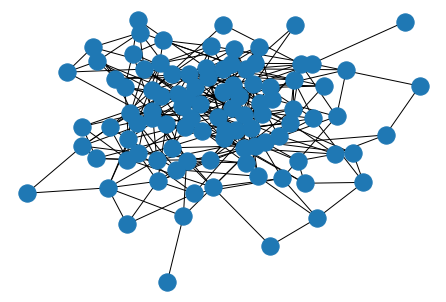

In [16]:
nx.draw(G)

In [17]:
list(G.nodes.data())

[(559657, {'cat': 'nocare'}),
 (768929, {'cat': 'proukr'}),
 (759751, {'cat': 'prorus'}),
 (388868, {'cat': 'proukr'}),
 (578801, {'cat': 'pax'}),
 (258347, {'cat': 'proukr'}),
 (455353, {'cat': 'proukr'}),
 (868612, {'cat': 'prorus'}),
 (648152, {'cat': 'proukr'}),
 (205412, {'cat': 'nocare'}),
 (537293, {'cat': 'prorus'}),
 (926365, {'cat': 'pax'}),
 (531869, {'cat': 'proukr'}),
 (828117, {'cat': 'nocare'}),
 (627163, {'cat': 'nocare'}),
 (251458, {'cat': 'nocare'}),
 (441904, {'cat': 'nocare'}),
 (957232, {'cat': 'proukr'}),
 (527175, {'cat': 'proukr'}),
 (980889, {'cat': 'prorus'}),
 (243154, {'cat': 'prorus'}),
 (738293, {'cat': 'nocare'}),
 (335007, {'cat': 'proukr'}),
 (559855, {'cat': 'proukr'}),
 (270002, {'cat': 'proukr'}),
 (530081, {'cat': 'proukr'}),
 (675831, {'cat': 'prorus'}),
 (313446, {'cat': 'nocare'}),
 (241617, {'cat': 'pax'}),
 (874164, {'cat': 'pax'}),
 (689594, {'cat': 'pax'}),
 (602485, {'cat': 'pax'}),
 (922259, {'cat': 'nocare'}),
 (196682, {'cat': 'prorus'})

# Community discovery algorithms

# Label Propagation

In [18]:
label_prop = algorithms.label_propagation(G)
label_prop.method_name

'Label Propagation'

In [106]:
label_prop_com=label_prop.communities
communities=[]

for i, c in enumerate(label_prop_com):
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes['id']==e,'cat'] =='pax').any()==True:
            c_pax += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='proukr').any()==True:
            c_proukr += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='prorus').any()==True:
            c_prorus += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='nocare').any()==True:
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        cat_value[i]=pax,proukr,nocare,prorus
    communities.append(cat_value)
communities

[{0: ({'pax': 26}, {'proukr': 26}, {'nocare': 26}, {'prorus': 22})}]

In [20]:
print(len(label_prop.communities))

1

In [21]:
label_prop.overlap

False

In [22]:
label_prop.node_coverage

1.0

In [23]:
label_prop.to_json()

'{"communities": [[638977, 667664, 953877, 559657, 975916, 441904, 251458, 644167, 196682, 484441, 386140, 205412, 313446, 536183, 563834, 448646, 753809, 922259, 978075, 926365, 335007, 530081, 929957, 760489, 516266, 270002, 874164, 455353, 537293, 242385, 719058, 245460, 828117, 167637, 270548, 873690, 431327, 328417, 509155, 714982, 328422, 341226, 559855, 578801, 521969, 521974, 520440, 388868, 868612, 639778, 258347, 774446, 872238, 957232, 279857, 112438, 406329, 453946, 684859, 657212, 527175, 573258, 547150, 413009, 168280, 676188, 602485, 401280, 949136, 286103, 393623, 980889, 779671, 531869, 768929, 325032, 785335, 181689, 689594, 382397, 759751, 887751, 643534, 716238, 241617, 243154, 588242, 830421, 985046, 648152, 256985, 981978, 627163, 667626, 776684, 937965, 602609, 630258, 738293, 675831]], "algorithm": "Label Propagation", "params": {"": ""}, "overlap": false, "coverage": 1.0}'

# Louvain 

In [26]:
#Leiden algorithm is an improvement of the Louvain algorithm
louvain = algorithms.leiden(G)
louvain.method_name 

'Leiden'

In [27]:
#Clustering parameters
louvain.method_parameters 

{'initial_membership': None, 'weights': None}

In [107]:
louvain_com=louvain.communities
communities=[]

for i, c in enumerate(louvain_com):
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes['id']==e,'cat'] =='pax').any()==True:
            c_pax += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='proukr').any()==True:
            c_proukr += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='prorus').any()==True:
            c_prorus += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='nocare').any()==True:
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        cat_value[i]=pax,proukr,nocare,prorus
    communities.append(cat_value)
communities

[{0: ({'pax': 4}, {'proukr': 2}, {'nocare': 6}, {'prorus': 8})},
 {1: ({'pax': 3}, {'proukr': 10}, {'nocare': 3}, {'prorus': 1})},
 {2: ({'pax': 6}, {'proukr': 2}, {'nocare': 2}, {'prorus': 3})},
 {3: ({'pax': 4}, {'proukr': 3}, {'nocare': 5}, {'prorus': 1})},
 {4: ({'pax': 5}, {'proukr': 1}, {'nocare': 4}, {'prorus': 2})},
 {5: ({'pax': 2}, {'proukr': 4}, {'nocare': 3}, {'prorus': 1})},
 {6: ({'pax': 1}, {'proukr': 2}, {'nocare': 1}, {'prorus': 4})},
 {7: ({'pax': 1}, {'proukr': 2}, {'nocare': 2}, {'prorus': 2})}]

In [31]:
#veirfy if the clustering overlap or not
louvain.overlap 

False

In [32]:
#percentage of node covered by the clustering
louvain.node_coverage 

1.0

In [33]:
#json representation of the results
louvain.to_json()

'{"communities": [[559657, 205412, 531869, 980889, 738293, 689594, 760489, 413009, 639778, 981978, 975916, 242385, 676188, 547150, 448646, 325032, 949136, 573258, 929957, 719058], [388868, 258347, 868612, 648152, 957232, 527175, 335007, 753809, 667664, 328417, 286103, 168280, 563834, 484441, 270548, 520440, 657212], [559855, 241617, 922259, 774446, 256985, 328422, 521974, 245460, 167637, 887751, 830421, 393623, 779671], [537293, 926365, 251458, 530081, 985046, 873690, 684859, 953877, 401280, 279857, 181689, 872238, 386140], [759751, 874164, 602485, 643534, 714982, 341226, 431327, 453946, 776684, 536183, 978075, 509155], [768929, 828117, 627163, 270002, 667626, 588242, 937965, 716238, 516266, 382397], [243154, 675831, 313446, 196682, 785335, 644167, 521969, 602609], [578801, 455353, 441904, 112438, 406329, 630258, 638977]], "algorithm": "Leiden", "params": {"initial_membership": null, "weights": null}, "overlap": false, "coverage": 1.0}'

# Girvan Newman

In [37]:
girvan_newman=algorithms.girvan_newman(G, level=4)

In [108]:
girvan_com=girvan_newman.communities
communities=[]

for i, c in enumerate(girvan_com):
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes['id']==e,'cat'] =='pax').any()==True:
            c_pax += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='proukr').any()==True:
            c_proukr += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='prorus').any()==True:
            c_prorus += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='nocare').any()==True:
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        cat_value[i]=pax,proukr,nocare,prorus
    communities.append(cat_value)
communities

[{0: ({'pax': 24}, {'proukr': 23}, {'nocare': 24}, {'prorus': 20})},
 {1: ({'pax': 1}, {'proukr': 1}, {'nocare': 1}, {'prorus': 1})},
 {2: ({'pax': 0}, {'proukr': 2}, {'nocare': 0}, {'prorus': 0})},
 {3: ({'pax': 1}, {'proukr': 0}, {'nocare': 0}, {'prorus': 1})},
 {4: ({'pax': 0}, {'proukr': 0}, {'nocare': 1}, {'prorus': 0})}]

In [39]:
girvan_newman.overlap

False

In [40]:
girvan_newman.node_coverage

1.0

In [41]:
girvan_newman.to_json()

'{"communities": [[667664, 953877, 559657, 975916, 441904, 251458, 644167, 196682, 484441, 386140, 205412, 313446, 536183, 563834, 448646, 753809, 922259, 978075, 926365, 335007, 929957, 760489, 516266, 270002, 874164, 537293, 242385, 719058, 245460, 167637, 828117, 270548, 873690, 431327, 328417, 509155, 328422, 714982, 341226, 559855, 521969, 521974, 520440, 868612, 388868, 639778, 258347, 957232, 279857, 112438, 406329, 453946, 684859, 657212, 527175, 573258, 547150, 413009, 168280, 676188, 602485, 401280, 949136, 779671, 286103, 980889, 393623, 531869, 768929, 325032, 785335, 181689, 689594, 382397, 759751, 716238, 241617, 243154, 588242, 830421, 985046, 648152, 256985, 981978, 627163, 667626, 776684, 937965, 602609, 738293, 675831], [578801, 630258, 455353, 638977], [530081, 872238], [774446, 887751], [643534]], "algorithm": "Girvan Newman", "params": {"level": 4}, "overlap": false, "coverage": 1.0}'

# Angel 

In [44]:
angel= algorithms.angel(G, threshold=0.25)#min_com_size=3

In [45]:
angel.method_parameters

{'threshold': 0.25, 'min_community_size': 3}

In [109]:
angel_com=angel.communities
communities=[]

for i, c in enumerate(angel_com):
    cat_value={}
    pax={}
    proukr={}
    nocare={}
    prorus={}
    c_pax=0
    c_proukr=0
    c_nocare=0
    c_prorus=0
    for e in c:
        if (df_nodes.loc[df_nodes['id']==e,'cat'] =='pax').any()==True:
            c_pax += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='proukr').any()==True:
            c_proukr += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='prorus').any()==True:
            c_prorus += 1
        elif (df_nodes.loc[df_nodes['id']==e,'cat'] =='nocare').any()==True:
            c_nocare +=1
        pax['pax']=c_pax
        proukr['proukr']=c_proukr
        nocare['nocare']=c_nocare
        prorus['prorus']=c_prorus
        cat_value[i]=pax,proukr,nocare,prorus
    communities.append(cat_value)
communities

[{0: ({'pax': 1}, {'proukr': 1}, {'nocare': 3}, {'prorus': 0})},
 {1: ({'pax': 3}, {'proukr': 1}, {'nocare': 0}, {'prorus': 1})},
 {2: ({'pax': 1}, {'proukr': 3}, {'nocare': 0}, {'prorus': 0})},
 {3: ({'pax': 3}, {'proukr': 0}, {'nocare': 1}, {'prorus': 0})},
 {4: ({'pax': 0}, {'proukr': 1}, {'nocare': 1}, {'prorus': 1})}]

In [48]:
angel.overlap

True

In [49]:
angel.node_coverage

0.21

In [50]:
angel.to_json()

'{"communities": [[181689, 251458, 401280, 684859, 985046], [245460, 256985, 393623, 559855, 830421], [388868, 657212, 768929, 929957], [509155, 602485, 714982, 776684], [258347, 441904, 868612]], "algorithm": "ANGEL", "params": {"threshold": 0.25, "min_community_size": 3}, "overlap": true, "coverage": 0.21}'

# Community Visualization

In [59]:
pos = nx.spring_layout(G)

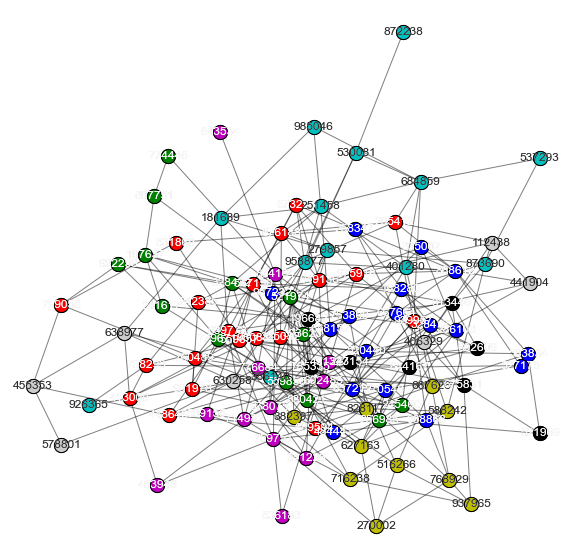

In [98]:
viz.plot_network_clusters(G, louvain, pos, figsize=(10, 10), plot_labels=True)
#viz.plot_network_clusters(G,louvain, pos) visualizzazione alternativa

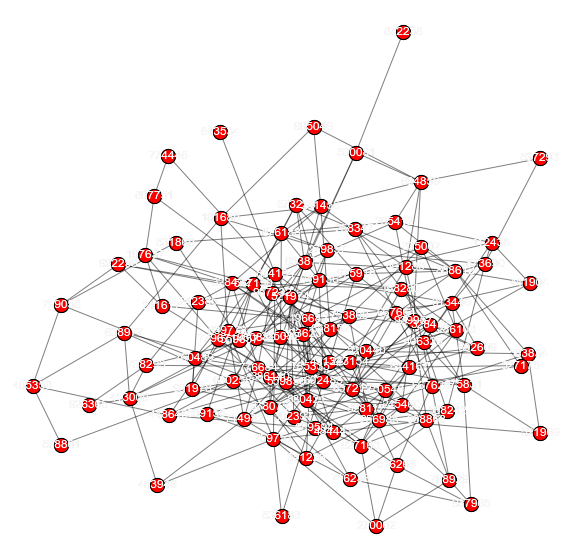

In [99]:
viz.plot_network_clusters(G, label_prop, pos, figsize=(10, 10), plot_labels=True)

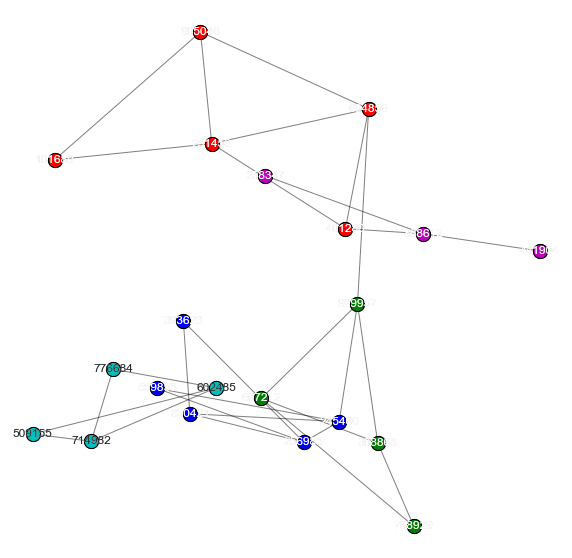

In [100]:
viz.plot_network_clusters(G, angel, pos, figsize=(10, 10), plot_labels=True)

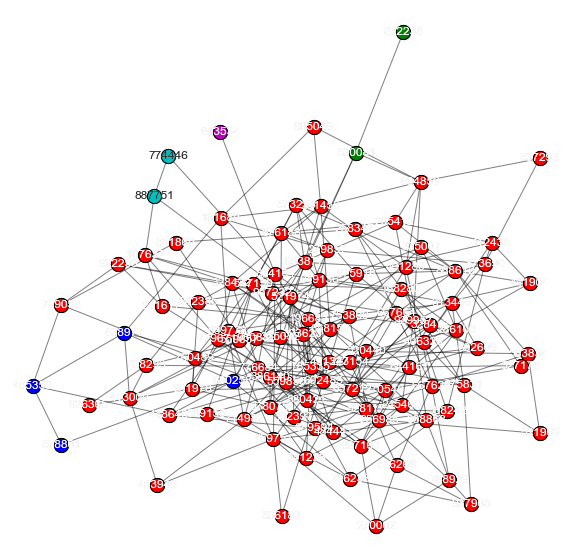

In [101]:
viz.plot_network_clusters(G, girvan_newman, pos, figsize=(10, 10), plot_labels=True)

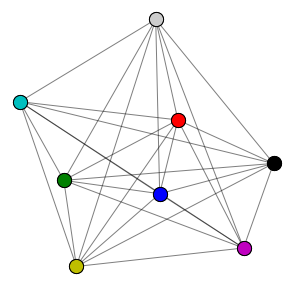

In [102]:
viz.plot_community_graph(G, louvain, figsize=(5, 5))

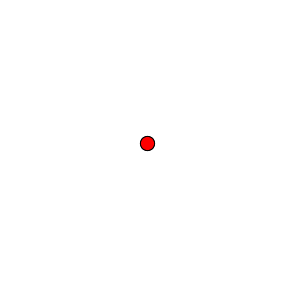

In [103]:
viz.plot_community_graph(G, label_prop, figsize=(5, 5))

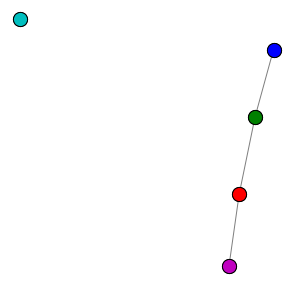

In [104]:
viz.plot_community_graph(G, angel, figsize=(5, 5))

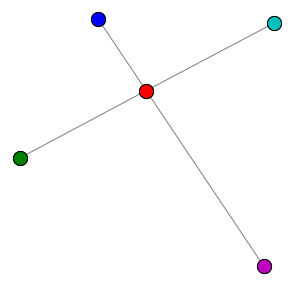

In [105]:
viz.plot_community_graph(G, girvan_newman, figsize=(5, 5))

# Community Internal Evaluation

In [89]:
print('Average Node Degree:\n'
     'Louvain = {} \n'
     'Label Propagation = {}\n'
     'Girvan Newman = {} \n'
     'Angel = {}'.format(louvain.average_internal_degree(),label_prop.average_internal_degree(),girvan_newman.average_internal_degree(),angel.average_internal_degree()))
print('Internal Edge Density:\n'
     'Louvain = {} \n'
     'Label Propagation = {}\n'
     'Girvan Newman = {} \n'
     'Angel = {}'.format(louvain.internal_edge_density(),label_prop.internal_edge_density(),girvan_newman.internal_edge_density(),angel.internal_edge_density()))
print('Modularity:\n'
     'Louvain = {} \n'
     'Label Propagation = {}\n'
     'Girvan Newman = {} \n'
     'Angel = {}'.format(louvain.modularity_density(),label_prop.modularity_density(),girvan_newman.modularity_density(),angel.modularity_density()))
print('Conductance:\n'
     'Louvain = {} \n'
     'Label Propagation = {}\n'
     'Girvan Newman = {} \n'
     'Angel = {}'.format(louvain.conductance(),label_prop.conductance(),girvan_newman.conductance(), angel.conductance()))


Average Node Degree:
Louvain = FitnessResult(min=2.2857142857142856, max=3.6470588235294117, 
score=2.954096638655462, std=0.42844794459446106) 
Label Propagation = FitnessResult(min=5.9, max=5.9, score=5.9, std=0.0)
Girvan Newman = FitnessResult(min=0.0, max=6.0, score=2.0, std=2.0976176963403033) 
Angel = FitnessResult(min=1.3333333333333333, max=2.8, score=2.3866666666666667, 
std=0.5434866859250351)

Internal Edge Density:
Louvain = FitnessResult(min=0.17894736842105263, max=0.38095238095238093, 
score=0.2786027708531579, std=0.06384451802726498) 
Label Propagation = FitnessResult(min=0.0595959595959596, max=0.0595959595959596, 
score=0.0595959595959596, std=0.0)
Girvan Newman = FitnessResult(min=0, max=1.0, score=0.5466666666666666, 
std=0.4369591895513051) 
Angel = FitnessResult(min=0.6666666666666666, max=0.8333333333333334, 
score=0.7466666666666667, std=0.07180219742846009)

Modularity:
Louvain = FitnessResult(min=None, max=None, score=0.7053921568627453, std=None) 
Label Propagation = FitnessResult(min=None, max=None, score=5.9, std=None)
Girvan Newman = FitnessResult(min=None, max=None, score=3.574175824175825, std=None) 
Angel = FitnessResult(min=None, max=None, score=-10.666666666666666, std=None)

Conductance:
Louvain = FitnessResult(min=0.42857142857142855, max=0.6363636363636364, 
score=0.48914323310962093, std=0.06095319352434865) 
Label Propagation = FitnessResult(min=0.0, max=0.0, score=0.0, std=0.0)
Girvan Newman = FitnessResult(min=0.028469750889679714, max=1.0, score=0.5515763031191124, 
std=0.30980808656714626) 
Angel = FitnessResult(min=0.5172413793103449, max=0.7894736842105263, 
score=0.6523340036951651, std=0.08764862805928464)

### Community fitness/comparison visualization

<AxesSubplot:xlabel='Algorithm', ylabel='internal_edge_density'>

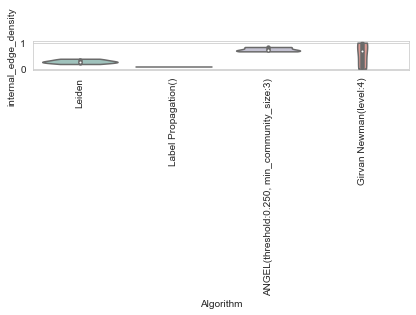

In [110]:
viz.plot_com_stat([louvain, label_prop, angel, girvan_newman], evaluation.internal_edge_density)

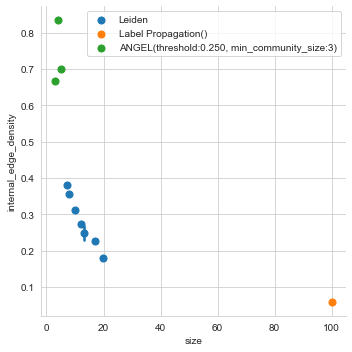

In [111]:
viz.plot_com_properties_relation([louvain, label_prop, angel], evaluation.size, evaluation.internal_edge_density)

In [ ]:
### Qualitative evaluation: da rivedere

# Community Comparison

In [92]:
louvain.normalized_mutual_information(label_prop)

MatchingResult(score=0.0, std=None)

In [93]:
girvan_newman.normalized_mutual_information(label_prop)

MatchingResult(score=0.0, std=None)

In [94]:
evaluation.normalized_mutual_information(louvain, girvan_newman)

MatchingResult(score=0.1827335928620404, std=None)

In [95]:
evaluation.normalized_mutual_information(louvain, label_prop)

MatchingResult(score=0.0, std=None)

In [96]:
evaluation.normalized_mutual_information(girvan_newman, label_prop)

MatchingResult(score=0.0, std=None)

# Ground Truth (External) evaluation

<AxesSubplot:xlabel='graph', ylabel='score'>

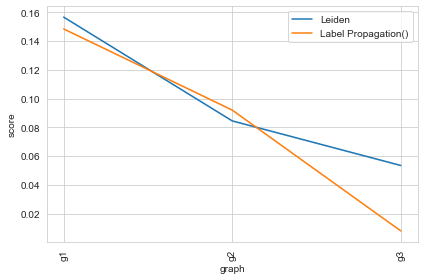

In [59]:
g1 = LFR_benchmark_graph(1000, 3, 1.5, 0.5, min_community=20, average_degree=5)
g2 = LFR_benchmark_graph(1000, 3, 1.5, 0.6, min_community=20, average_degree=5)
g3 = LFR_benchmark_graph(1000, 3, 1.5, 0.7, min_community=20, average_degree=5)

names = ["g1", "g2", "g3"]
graphs = [g1, g2, g3]
references = []

# building the NodeClustering ground truth for the graphs
for G in graphs:
    ground_truth = NodeClustering(communities={frozenset(G.nodes[v]['community']) for v in G}, graph=G, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.leiden, algorithms.label_propagation]

# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

In [60]:
lp_coms = algorithms.label_propagation(G)
leiden_coms = algorithms.leiden(G)
wp_coms = algorithms.walktrap(G)
infomap_coms = algorithms.infomap(G)

viz.plot_sim_matrix([leiden_coms, lp_coms, wp_coms, infomap_coms],evaluation.adjusted_mutual_information)

ModuleNotFoundError: Optional dependency not satisfied: install package wurlitzer to use infomap.